# Non-Ideal Behaviour

In [27]:
import numpy as np
import matplotlib.pyplot as plt

## Limited Binding Capacity

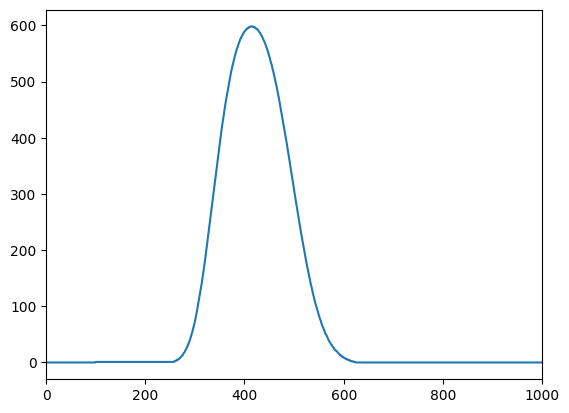

In [32]:
# Define parameters
n_cells = 100
n_steps = 1000
n_molecules = 100_000
n_capacity = 2_500 # limit binding capacity of stationary phase cells
K = 4

# Reformat K to a fractional entity
frac_bound = K / (1 + K)

# Initial state (zero everywhere)
stationary_phase = np.zeros(n_cells)
mobile_phase = np.zeros(n_cells + n_steps)

# Loading of mobile phase in cell just before the stationary phase
mobile_phase[n_cells] = n_molecules

for step in range(1, n_steps + 1):
    # Equilibration
    for cell in range(n_cells):
        n_tot = stationary_phase[cell] + mobile_phase[cell + step]
        n_bound = np.floor(n_tot * frac_bound)
        # Enforce capacity limit
        if n_bound > n_capacity:
            n_bound = n_capacity
        n_free = n_tot - n_bound
        stationary_phase[cell] = n_bound
        mobile_phase[cell + step] = n_free

plt.plot(mobile_phase)
plt.xlim(0, n_steps)
plt.show()

## Limit Adsorption/Desorption Rate

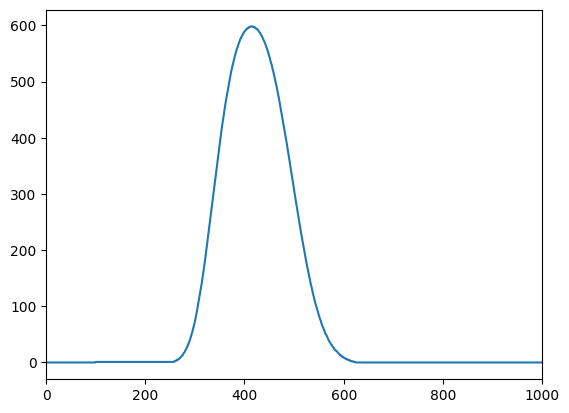

In [33]:
# Define parameters
n_cells = 100
n_steps = 1000
n_molecules = 100_000
n_delta = 2_500
K = 4

# Reformat K to a fractional entity
frac_bound = K / (1 + K)

# Initial state (zero everywhere)
stationary_phase = np.zeros(n_cells)
mobile_phase = np.zeros(n_cells + n_steps)

# Loading of mobile phase in cell just before the stationary phase
mobile_phase[n_cells] = n_molecules

for step in range(1, n_steps + 1):
    # Equilibration
    for cell in range(n_cells):
        n_bound_old = stationary_phase[cell]
        n_tot = n_bound_old + mobile_phase[cell + step]
        n_bound = np.floor(n_tot * frac_bound)
        # Enforce rate limit
        # Adsorption
        if n_bound > n_bound_old + n_delta:
            n_bound = n_bound_old + n_delta
        # Desorption
        if n_bound < n_bound_old - n_delta:
            n_bound = n_bound_old - n_delta
        n_free = n_tot - n_bound
        stationary_phase[cell] = n_bound
        mobile_phase[cell + step] = n_free

plt.plot(mobile_phase)
plt.xlim(0, n_steps)
plt.show()

## Decreasing Binding Affinity with Loading

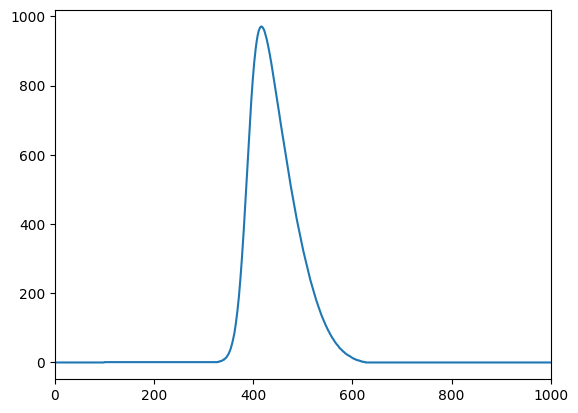

In [ ]:
# Define parameters
n_cells = 100
n_steps = 1000
n_molecules = 100_000
K = 4

def frac_bound(n_bound):
    # Reform K to a fractional entity - now also depending on loading
    k = K * np.exp(-n_bound / 30_000)
    frac_bound = k / (1 + k)
    return frac_bound

# Initial state (zero everywhere)
stationary_phase = np.zeros(n_cells)
mobile_phase = np.zeros(n_cells + n_steps)

# Loading of mobile phase in cell just before the stationary phase
mobile_phase[n_cells] = n_molecules

for step in range(1, n_steps + 1):
    # Equilibration
    for cell in range(n_cells):
        n_bound_old = stationary_phase[cell]
        n_tot = n_bound_old + mobile_phase[cell + step]
        n_bound = np.floor(n_tot * frac_bound(n_bound_old))
        n_free = n_tot - n_bound
        stationary_phase[cell] = n_bound
        mobile_phase[cell + step] = n_free

plt.plot(mobile_phase)
plt.xlim(0, n_steps)
plt.show()